# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#url from https://openweathermap.org/appid
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

In [6]:
# set up lists to hold reponse info
cities_found = []
lat = []
lon = []
temp = []
humid = []
cloud = []
wind = []
date = []
country = []

# Loop through the list of cities and perform a request for data on each
#Try/Except

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities_found.append(city)   
        print(f"City Identified {city}")
    except:
        print(f"City NOT Found {city}")

City Identified punta arenas
City Identified divnogorsk
City Identified hermanus
City Identified kapaa
City Identified zhicheng
City Identified oakdale
City Identified bubaque
City Identified fallon
City NOT Found nizhneyansk
City Identified atuona
City Identified port augusta
City Identified alberton
City Identified pringsewu
City Identified castro
City Identified hithadhoo
City Identified anadyr
City NOT Found taolanaro
City Identified mar del plata
City Identified busselton
City Identified faanui
City Identified tasiilaq
City Identified tiksi
City Identified mumford
City Identified saint-pierre
City Identified coquimbo
City Identified yeppoon
City Identified puerto ayora
City Identified cidreira
City Identified vestmannaeyjar
City Identified dongkan
City Identified mataura
City Identified vaini
City Identified namibe
City Identified bukachacha
City Identified kodiak
City NOT Found illoqqortoormiut
City Identified bardiyah
City Identified rikitea
City Identified ugoofaaru
City Identi

City Identified qui nhon
City Identified thakurgaon
City Identified beisfjord
City Identified sinop
City Identified elmira
City NOT Found grand centre
City Identified nouadhibou
City Identified esil
City Identified perth
City Identified chinhoyi
City Identified marzuq
City Identified guerrero negro
City Identified umm lajj
City Identified christchurch
City NOT Found vaitupu
City Identified klaksvik
City Identified aksarka
City Identified khasan
City Identified sioux lookout
City Identified lincoln
City Identified xicotencatl
City Identified kiunga
City Identified gizo
City Identified vitim
City NOT Found mrirt
City Identified carbondale
City Identified gat
City Identified requena
City NOT Found palabuhanratu
City Identified bodden town
City Identified ancud
City Identified aklavik
City NOT Found sedelnikovo
City Identified jiwani
City Identified kununurra
City NOT Found tsihombe
City Identified verkh-usugli
City Identified talnakh
City Identified menomonie
City Identified korla
City Id

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
weather_data = pd.DataFrame({
    'City': cities_found,
    'Country': country,   
    'Tempurature': temp,
    'Humidity': humid,
    'Cloudiness': cloud,
    'Wind Speed': wind,
    'Latitude': lat,
    'Longitude': lon,
    'Date': date
    
})

In [32]:
weather_data.to_csv("cities_weather.csv")

weather_data

,City,Country,Tempurature,Humidity,Cloudiness,Wind Speed,Latitude,Date
0,punta arenas,CL,46.40,81,40,20.80,-70.92,1602379463
1,divnogorsk,RU,28.40,86,75,8.95,92.36,1602379463
2,hermanus,ZA,48.99,86,0,1.01,19.23,1602379464
3,kapaa,US,87.80,55,40,11.41,-159.32,1602379464
4,zhicheng,CN,72.25,63,0,1.86,111.50,1602379831
...,...,...,...,...,...,...,...,...
536,parsabad,IR,51.80,100,0,4.70,47.92,1602379513
537,fonte boa,BR,79.21,67,94,1.50,-66.27,1602379513
538,thurso,GB,46.40,93,91,14.99,-3.53,1602379513
539,ourem,PT,63.00,87,0,4.70,-8.59,1602379513


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#weather_data.describe()

In [16]:
#Get the indices of cities that have humidity over 100%.

high_humidity = weather_data [(weather_data['Humidity'] > 100)].index

high_humidity

Int64Index([], dtype='int64')

In [20]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


In [ ]:
#Cannot figure this part out

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [28]:
#Set max date as "runDate" for graph titles
endRunDate = weather_data["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

## Latitude vs. Temperature Plot

In [41]:
#set data to plot
x = weather_data["Latitude"]
y = weather_data["Temperature"] #Getting weird error that there is something wrong with temperature
plt.scatter(x,y)

#add gridlines
plt.grid()

#add titles and axis labels
plt.title(f"Latitude vs Temperature on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

#export as png
plt.savefig(f'Latitude vs Temperature on {runDate}.png')

#display plot
plt.show()

KeyError: 'Temperature'

## Latitude vs. Humidity Plot

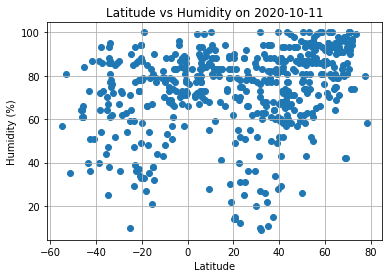

In [40]:
#set data to plot
h = weather_data["Humidity"]
plt.scatter(x,h)

#add gridlines
plt.grid()

#add titles and axis labels
plt.title(f"Latitude vs Humidity on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#export as png
plt.savefig(f'Latitude vs Humidity on {runDate}.png')

#display plot
plt.show()

## Latitude vs. Cloudiness Plot

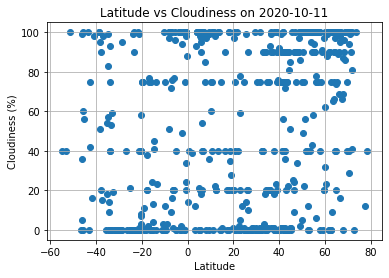

In [42]:
#set data to plot
c = weather_data["Cloudiness"]
plt.scatter(x,c)

#add gridlines
plt.grid()

#add titles and axis labels
plt.title(f"Latitude vs Cloudiness on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#export as png
plt.savefig(f'Latitude vs Cloudiness on {runDate}.png')

#display plot
plt.show()

## Latitude vs. Wind Speed Plot

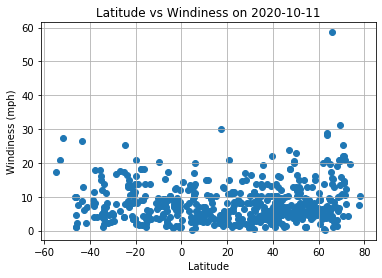

In [44]:
#set data to plot
w = weather_data["Wind Speed"]
plt.scatter(x,w)

#add gridlines
plt.grid()

#add titles and axis labels
plt.title(f"Latitude vs Windiness on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Windiness (mph)")

#export as png
plt.savefig(f'Latitude vs Windiness on {runDate}.png')

#display plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [60]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi = weather_data.loc[weather_data["Latitude"] > 0]
south_hemi = weather_data.loc[weather_data["Latitude"] < 0]

#north_hemi
#south_hemi

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [68]:
x_values = north_hemi['Latitude']
y_values = north_hemi['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f"Northern Hemisphere: Latitude vs Max Temp on {runDate}")
plt.show()

KeyError: 'Temperature'

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [67]:
x_values = south_hemi['Latitude']
y_values = south_hemi['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f"Southern Hemisphere: Latitude vs Max Temp on {runDate}")
plt.show()

KeyError: 'Temperature'

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

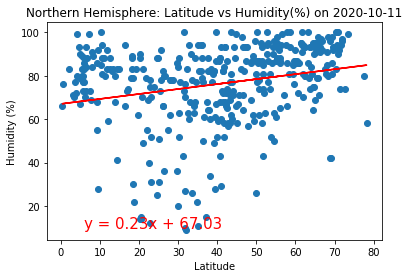

In [69]:
x_values = north_hemi['Latitude']
y_values = north_hemi['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Northern Hemisphere: Latitude vs Humidity(%) on {runDate}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

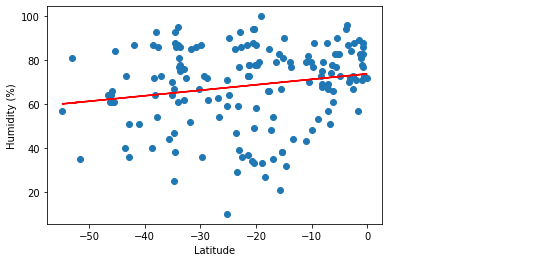

In [66]:
x_values = south_hemi['Latitude']
y_values = south_hemi['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Southern Hemisphere: Latitude vs Humidity(%) on {runDate}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

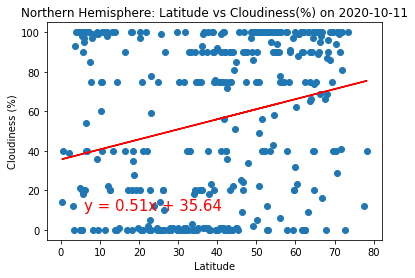

In [70]:
x_values = north_hemi['Latitude']
y_values = north_hemi['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Northern Hemisphere: Latitude vs Cloudiness(%) on {runDate}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

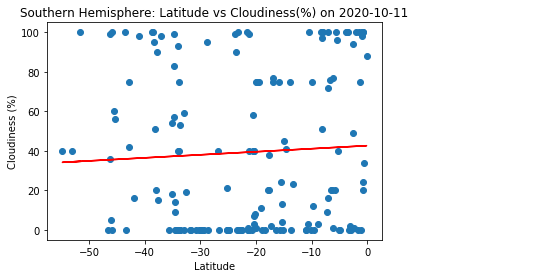

In [71]:
x_values = south_hemi['Latitude']
y_values = south_hemi['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Southern Hemisphere: Latitude vs Cloudiness(%) on {runDate}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

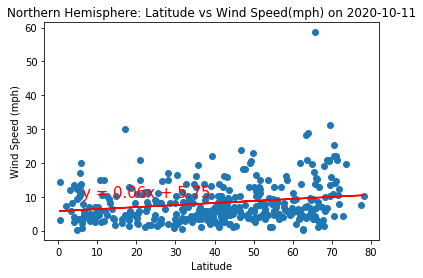

In [72]:
x_values = north_hemi['Latitude']
y_values = north_hemi['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"Northern Hemisphere: Latitude vs Wind Speed(mph) on {runDate}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

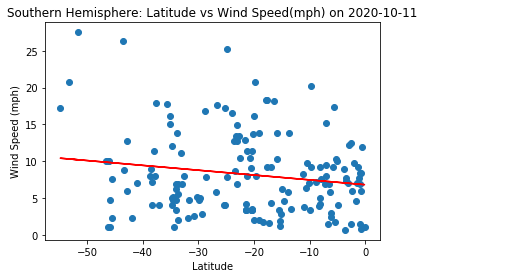

In [73]:
x_values = south_hemi['Latitude']
y_values = south_hemi['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"Southern Hemisphere: Latitude vs Wind Speed(mph) on {runDate}")
plt.show()